<a href="https://colab.research.google.com/github/crisalex25/TFM/blob/main/TFM_Algoritmos_predicci%C3%B3n_Precipitaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Fin de Master**
## **Máster Universitario en Inteligencia Artificial para el Sector de la Energía y las Infraestructuras**
Optimización de generación en centrales hidroeléctricas mediante técnicas de aprendizaje automático

## Procesamiento y analisis de datos


###Librerias

In [157]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [158]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fast')

In [159]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###Leer Dataset

In [160]:
PD="https://raw.githubusercontent.com/crisalex25/TFM/main/PrecD3.csv"


In [161]:
dfPD = pd.read_csv(PD, sep=';', decimal=",", parse_dates=['Fecha_Hora'])

fecha_limite = datetime(2023, 1, 1, 0, 0)  # Fecha límite

dfPD = dfPD[dfPD['Fecha_Hora'] <= fecha_limite]

##Modelos de predicción

###Precipitacion

MLP

In [162]:
# Leer los datos del DataFrame
df = dfPD

# Obtener los valores de las precipitaciones diarias
precipitaciones = df.iloc[:, 1].values

# Normalizar los datos en el rango de 0 a 1
precipitaciones_min = np.min(precipitaciones)
precipitaciones_max = np.max(precipitaciones)
precipitaciones = (precipitaciones - precipitaciones_min) / (precipitaciones_max - precipitaciones_min)

# Crear las listas para almacenar los datos de entrada (X) y salida (y)
X = []
y = []

# Crear los datos de entrenamiento y prueba
for i in range(len(precipitaciones) - 1):
    X.append(precipitaciones[i])
    y.append(precipitaciones[i + 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Convertir los datos a arrays de numpy
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mae')

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 64)                128       
                                                                 
 dense_112 (Dense)           (None, 32)                2080      
                                                                 
 dense_113 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [163]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=180, verbose=0)

In [164]:
# Realizar predicciones
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [165]:
# Desnormalizar las predicciones y los datos reales
y_pred = (y_pred * (precipitaciones_max - precipitaciones_min)) + precipitaciones_min
y_test = (y_test * (precipitaciones_max - precipitaciones_min)) + precipitaciones_min

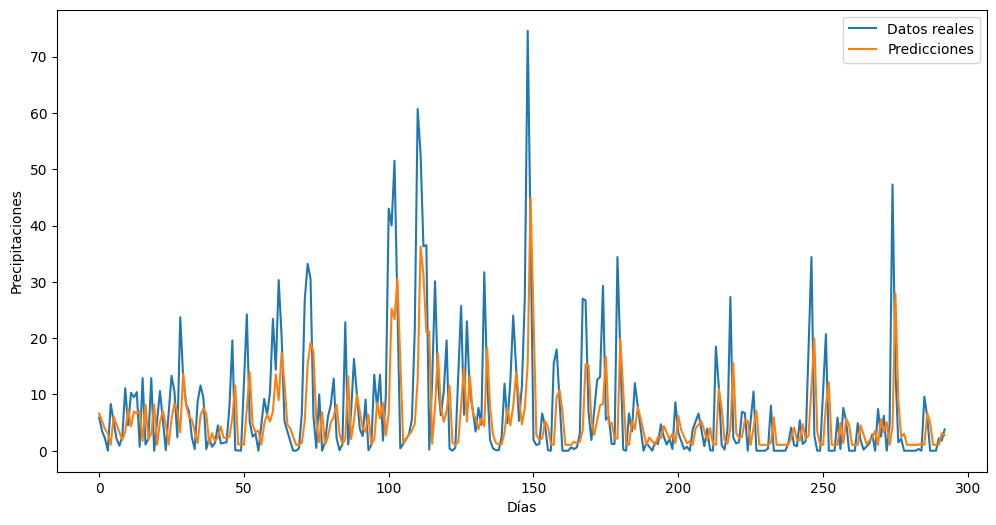

In [166]:
# Graficar las predicciones vs los datos reales del test
plt.plot(y_test, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Días')
plt.ylabel('Precipitaciones')
plt.legend()
plt.show()

In [167]:
# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R2):', r2)

Error cuadrático medio (MSE): 94.70289712247481
Error absoluto medio (MAE): 5.957424024754417
Coeficiente de determinación (R2): 0.22576794750019147


LSTM

10/10 [==============================] - 0s 3ms/step


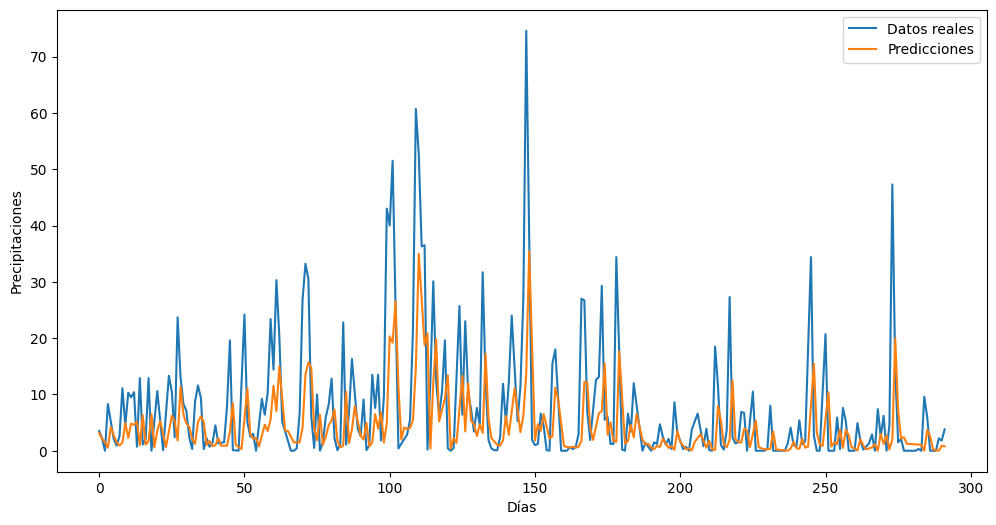

Error cuadrático medio (MSE): 0.015879170451586613
Error absoluto medio (MAE): 0.07478475513512645
Coeficiente de determinación (R2): 0.18429479915636293


In [168]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Leer los datos del DataFrame
df = dfPD  # Reemplaza 'datos.csv' con el nombre de tu archivo

# Obtener los valores de las precipitaciones diarias
precipitaciones = df.iloc[:, 1].values

# Normalizar los datos en el rango de 0 a 1
precipitaciones_min = np.min(precipitaciones)
precipitaciones_max = np.max(precipitaciones)
precipitaciones = (precipitaciones - precipitaciones_min) / (precipitaciones_max - precipitaciones_min)

# Crear las listas para almacenar los datos de entrada (X) y salida (y)
X = []
y = []

# Crear los datos de entrada y salida
sequence_length = 10  # Longitud de la secuencia de entrada para LSTM

for i in range(len(precipitaciones) - sequence_length):
    X.append(precipitaciones[i:i+sequence_length])
    y.append(precipitaciones[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Crear el modelo de red neuronal LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mae')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=180, verbose=0)

# Realizar predicciones
y_pred = model.predict(X_test)

# Asegurar que los valores de las predicciones no sean menores que cero
y_pred = np.maximum(y_pred, 0)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Desnormalizar las predicciones y los datos reales
y_pred = (y_pred * (precipitaciones_max - precipitaciones_min)) + precipitaciones_min
y_test = (y_test * (precipitaciones_max - precipitaciones_min)) + precipitaciones_min


# Graficar las predicciones vs los datos reales del test
plt.plot(y_test, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Días')
plt.ylabel('Precipitaciones')
plt.legend()
plt.show()

# Imprimir las métricas
print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R2):', r2)
